In [136]:
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [137]:
departements = gpd.read_file('https://www.data.gouv.fr/fr/datasets/r/ec305e78-f231-4a77-b32c-1e0c4c67615e')

In [138]:
dpt = departements[departements['code_departement'].isin(['75', '77', '78', '91', '92', '93', '94', '95' ])]

In [146]:
amenagements = gpd.read_file("https://www.data.gouv.fr/fr/datasets/r/33d97256-1829-41d3-b7b5-56e490846b85")
#https://www.data.gouv.fr/fr/datasets/amenagements-velo-en-ile-de-france-2/#_

In [188]:
#on regroupe les types d'aménagements pour que ça soit plus simple à l'affichage
def renommer (col, amenagements):
    l = []
    col = str(col)
    l.append(col)
    l.append('type')
    type_ = ''.join(l)
    conditionlist = [
                 (amenagements[col].isin(['chemin service site propre uni','chemin dedie uni','autre chemin velo uni'])), 
                 (amenagements[col].isin(['cheminement trottoir uni','piste trottoir uni'])),
                 (amenagements[col].isin(['piste uni', 'piste bi','DSC piste'])),
                 (amenagements[col].isin(['bande uni', 'bande bi', 'DSC bande'])),
                 (amenagements[col].isin(['voie verte uni'])),
                 (amenagements[col].isin(['voie bus uni']))]

    choicelist = ['voie propre', 'trottoir', 'piste', 'bande', 'voie verte', 'voie bus']
    amenagements[type_] = np.select(conditionlist, choicelist, default = 'double sens cyclable non marqué')
    return amenagements

In [189]:
col = 'ag'
amenagements = renommer(col, amenagements)
col = 'ad'
amenagements = renommer(col, amenagements)

In [198]:
demande = str((input('Que voulez-vous afficher ? \nbande, piste, trottoir, voie bus, voie propre, voie verte, double sens cyclable non marqué, tout')))
demande= list(demande.split(", "))

Que voulez-vous afficher ? 
bande, piste, trottoir, voie bus, voie propre, voie verte, double sens cyclable non marqué, toutvoie verte


In [200]:
if demande == ['tout']:
    amdem = amenagements
else :
    amdem = amenagements[(amenagements['adtype'].isin(demande))&(amenagements['agtype'].isin(demande))]

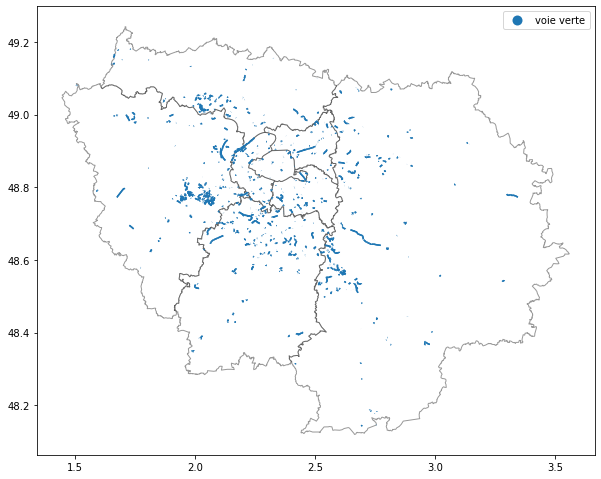

In [201]:
if demande == []:
    fig, ax = plt.subplots(figsize = (10,10))
    dpt.plot(ax=ax, color = 'white', edgecolor = 'black', alpha = 0.4)
    amdem.plot(ax=ax,column = 'agtype', legend = True)
    plt.show
else :   
    fig, ax = plt.subplots(figsize = (10,10))
    dpt.plot(ax=ax, color = 'white', edgecolor = 'black', alpha = 0.4)
    amdem.plot(ax=ax,column = 'adtype', legend = True)
    amdem.plot(ax=ax,column = 'agtype', legend = True)
    plt.show